In [1]:
import time

import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from copy import deepcopy
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.transforms as T

from collections import deque
import random
import datetime
import os
from atari_wrappers import wrap_dqn
from Agent import Agent

from IPython import display
plt.ion()
import time

In [2]:
use_gpu = torch.cuda.is_available()
print('Use GPU: {}'.format(use_gpu))

Use GPU: True


In [3]:
agent = Agent()
#agent.load_model('/scratch/ab8084/atari/saved/final_model_breakout.pth')

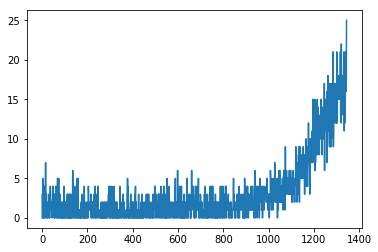

In [4]:
plt.plot(range(len(agent.reward_episodes)),agent.reward_episodes)

In [4]:
agent.benchmark

29.0

In [ ]:
agent.train(replay_buffer_fill_len=50000, 
            batch_size=32, 
            episodes=10**5,
            stop_reward=1900,
            max_epsilon_steps=1000000,
            epsilon_start=1,
            epsilon_final=0.05,
            sync_target_net_freq=10000)

Start training at: Sat Apr 27 15:36:37 2019
Populating Replay Buffer


Replay Buffer populated with 50000 transitions, starting training...


synchronizing target network...
global step: 4  | episode: 1  | episode_length: 4  | mean episode reward: 0.0
global step: 20  | episode: 2  | episode_length: 16  | mean episode reward: 1.0
global step: 387  | episode: 36  | episode_length: 34  | mean episode reward: 3.0
global step: 1618  | episode: 144  | episode_length: 42  | mean episode reward: 4.0
synchronizing target network...
global step: 11264  | episode: 1000  | mean episode_length: 11.264  | mean episode reward: 0.323
global step: 13968  | episode: 1243  | episode_length: 54  | mean episode reward: 6.0
synchronizing target network...
global step: 22532  | episode: 2000  | mean episode_length: 11.268  | mean episode reward: 0.334
synchronizing target network...
global step: 33869  | episode: 3000  | mean episode_length: 11.337  | mean episode reward: 0.354
synchronizing target network.

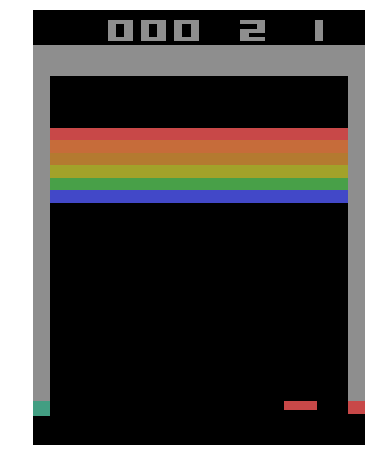

In [8]:
for i in range(5):
    done=False
    #agent.env = gym.wrappers.Monitor(agent.env, "recording")
    plt.figure(figsize=(10,8))
    state=agent.env.reset()
    #print(state.shape)
    plt.imshow(agent.env.render(mode='rgb_array'))
    plt.axis('off')
    plt.show()
    while not done:
        action = agent.select_action(state, 0)
        state, reward, done, _ = agent.env.step(action)
        display.clear_output(wait=True)
        plt.figure(figsize=(10,8))
        plt.imshow(agent.env.render(mode='rgb_array'))
        plt.axis('off')
        plt.show()
        time.sleep(0.1)